In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
import IPython 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

In [2]:
df_dirty = pd.read_csv("college_wage_premium.csv")

In [3]:
df_dirty.fillna(0, inplace = True) # DataFrame中的null替換為 0。
df = df_dirty
df.head()

,year,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41
3,2019,21.64,39.61,23.99,45.74,18.48,33.80
4,2018,21.50,38.87,23.72,44.97,18.49,33.03


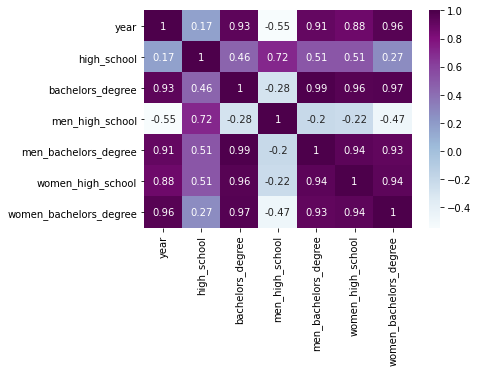

In [4]:
dfplot = sb.heatmap(df.corr(), cmap="BuPu", annot=True)

In [5]:
bachelors_sal = df['bachelors_degree']
high_sal = df['high_school']
years = df['year']
salary_difference = bachelors_sal - high_sal # 大學薪資-高中薪資
df['salary_difference'] = salary_difference # 兩者間的差異值
display(salary_difference)

0     19.66
1     19.04
2     18.95
3     17.97
4     17.37
5     17.39
6     17.73
7     17.15
8     16.13
9     16.69
10    16.26
11    15.77
12    16.36
13    15.88
14    16.11
15    16.19
16    15.82
17    15.82
18    15.45
19    15.64
20    15.87
21    15.97
22    15.64
23    15.09
24    14.58
25    13.49
26    12.88
27    13.18
28    12.84
29    12.51
30    12.51
31    12.10
32    12.47
33    11.82
34    12.75
35    12.59
36    12.06
37    11.10
38    10.77
39    10.30
40     9.90
41     9.49
42     9.14
43     8.95
44     9.38
45     9.57
46     9.70
47     9.90
48    10.09
49    10.58
dtype: float64

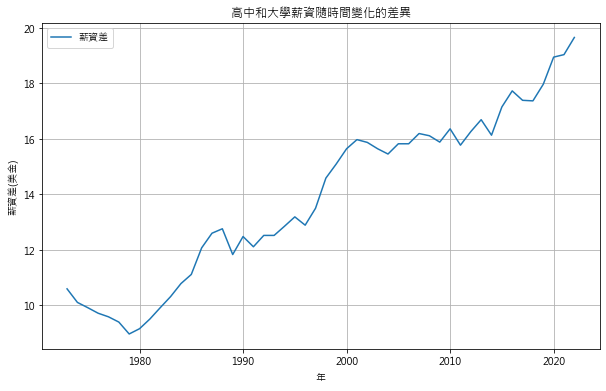

In [6]:
plt.rcParams["font.sans-serif"] = ['Microsoft JhengHei']
plt.figure(figsize=(10, 6))
plt.plot(years, salary_difference, label='薪資差')
plt.xlabel('年')
plt.ylabel('薪資差(美金)')
plt.title('高中和大學薪資隨時間變化的差異')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
ov_summary_df = pd.DataFrame({
    '指標': ['最小值', '最大值'],
    '薪資差': [salary_difference.min(), salary_difference.max()],
    '年': [years[salary_difference.idxmin()], years[salary_difference.idxmax()]]
})

display(ov_summary_df)

,指標,薪資差,年
0,最小值,8.95,1979
1,最大值,19.66,2022


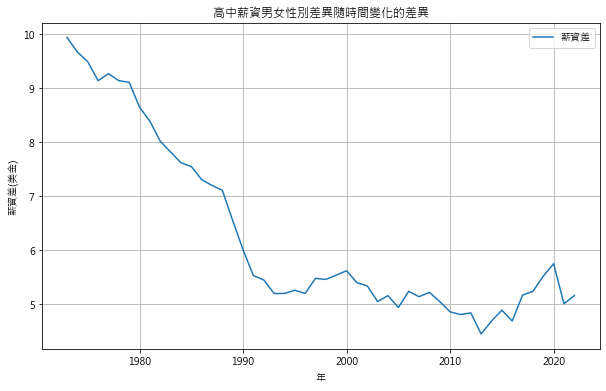

In [8]:
high_men_sal = df['men_high_school']
high_wom_sal = df['women_high_school']
high_sal_diff = high_men_sal - high_wom_sal
df['high_sal_diff'] = high_men_sal - high_wom_sal # 高中學歷男女薪資差

plt.figure(figsize=(10, 6))
plt.plot(years, high_sal_diff, label='薪資差')
plt.xlabel('年')
plt.ylabel('薪資差(美金)')
plt.title('高中薪資男女性別差異隨時間變化的差異')
plt.legend()
plt.grid(True)
plt.show()
# 顯示在1990年之前波動差距大

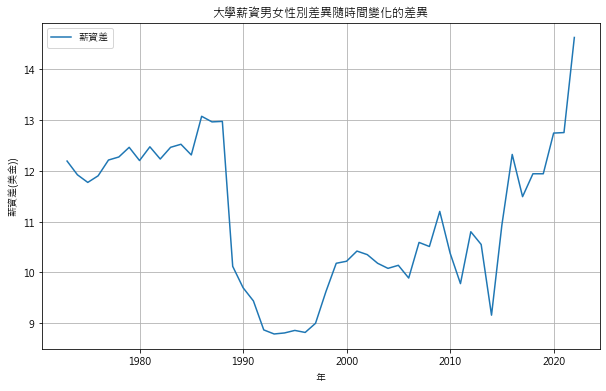

In [9]:
coll_men_sal = df['men_bachelors_degree']
coll_wom_sal = df['women_bachelors_degree']
coll_sal_diff = coll_men_sal - coll_wom_sal
df['coll_sal_diff'] = coll_men_sal - coll_wom_sal # 大學學歷男女薪資差

plt.figure(figsize=(10, 6))
plt.plot(years, coll_sal_diff, label='薪資差')
plt.xlabel('年')
plt.ylabel('薪資差(美金))')
plt.title('大學薪資男女性別差異隨時間變化的差異')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
min_sall_coll = df['coll_sal_diff'].min()
min_sall_high = df['high_sal_diff'].min()
min_year_coll = df.loc[df['coll_sal_diff'].idxmin(), 'year']
min_year_high = df.loc[df['high_sal_diff'].idxmin(), 'year']

max_sal_coll = df['coll_sal_diff'].max()
max_sal_high = df['high_sal_diff'].max()
max_year_coll = df.loc[df['coll_sal_diff'].idxmax(), 'year']
max_year_high = df.loc[df['high_sal_diff'].idxmax(), 'year']

ins_summary_df = pd.DataFrame({
    '指標': ['最小值', '最大值'],
    '大學薪資差異': [df['coll_sal_diff'].min(), df['coll_sal_diff'].max()],
    '高中薪資差異': [df['high_sal_diff'].min(), df['high_sal_diff'].max()],
    '年(大學)': [df.loc[df['coll_sal_diff'].idxmin(), 'year'], df.loc[df['coll_sal_diff'].idxmax(), 'year']],
    '年(高中)': [df.loc[df['high_sal_diff'].idxmin(), 'year'], df.loc[df['high_sal_diff'].idxmax(), 'year']]
})

display(ins_summary_df)

,指標,大學薪資差異,高中薪資差異,年(大學),年(高中)
0,最小值,8.79,4.44,1993,2013
1,最大值,14.62,9.93,2022,1973


In [11]:
ins_summary_df.to_csv('Data.csv', index=False)

In [12]:
max_men_sal_coll = df["men_bachelors_degree"].max()
min_men_sal_coll = df["men_bachelors_degree"].min()

max_wom_sal_coll = df["women_bachelors_degree"].max()
min_wom_sal_coll = df["women_bachelors_degree"].min()

Growth_wom_coll = ((max_wom_sal_coll - min_wom_sal_coll)/min_wom_sal_coll)*100
Growth_men_coll = ((max_men_sal_coll - min_men_sal_coll)/min_men_sal_coll)*100

max_men_sal_high = df["men_high_school"].max()
min_men_sal_high = df["men_high_school"].min()

max_wom_sal_high = df["women_high_school"].max()
min_wom_sal_high = df["women_high_school"].min()

Growth_wom_high = ((max_wom_sal_high - min_wom_sal_high) / min_wom_sal_high)*100
Growth_men_high =(( max_men_sal_high - min_men_sal_high)/min_men_sal_high)*100

growth_df = pd.DataFrame({
    
    '性別': ['大學學歷的薪資成長率', '高中學歷的薪資成長率'],
    '男': [Growth_men_coll, Growth_men_high], 
    '女': [Growth_wom_coll, Growth_wom_high]
    
})
growth_df['男'] = growth_df['男'].apply(lambda x: f'{x:.2f}%')
growth_df['女'] = growth_df['女'].apply(lambda x: f'{x:.2f}%')
display(growth_df)

# 比較男性和女性在不同教育背景下薪資的變化率，了解性別在學歷與薪資之間的關係

,性別,男,女
0,大學學歷的薪資成長率,39.39%,54.36%
1,高中學歷的薪資成長率,21.66%,17.69%


In [13]:
growth_df.to_csv('output_data.csv', index=False)

迴歸係數: [0.20374987]
截距: -393.0912079700068
MSE: 0.2752910176591393
R^2 Score: 0.9463711657864654


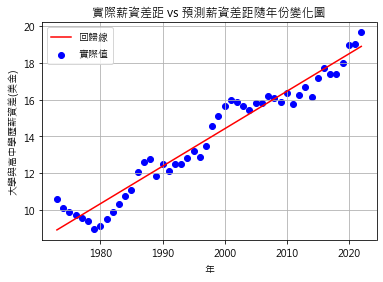

In [14]:
# 預測大學與高中學歷根據年代而不同的薪資差距
X = df[['year']]
y = df['salary_difference']

# 將資料集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 對整個資料集進行預測，用於繪製圖表
y_all_pred = model.predict(X)

# 評估模型在測試集上的表現
y_test_pred = model.predict(X_test)
print("迴歸係數:", model.coef_)
print("截距:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score:", r2_score(y_test, y_test_pred))


plt.scatter(X, y, color='blue', label='實際值')
plt.plot(X, y_all_pred, color='red', label='回歸線')
plt.xlabel("年")
plt.ylabel("大學與高中學歷薪資差(美金)")
plt.title("實際薪資差距 vs 預測薪資差距隨年份變化圖")
plt.legend()
plt.grid(True)
plt.show()

# 數值表明線性回歸模型對於描述 'year' 和 '大學與高中學歷薪資差' 之間的關係具有高度的解釋能力，並且在測試集上的表現相當良好。

In [15]:
df.to_csv('processed_data.csv', index=False)

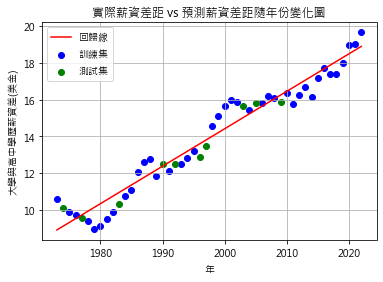

平均絕對百分比誤差 (MAPE): 3.7040885803937225
平均絕對誤差 (MAE): 0.45395645158104936
均方誤差 (MSE): 0.2752910176591393
R² Score: 0.9463711657864654
迴歸係數: [0.20374987]
截距: -393.0912079700068


In [25]:
# 新增平均絕對誤差 (MAE) 的評估與訓練集和測試集的回歸線

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 定義計算MAPE的函數
def calculate_mape(predictions, actual_values):
    # 避免除以0的情況，如果實際值為0，將其替換為一個非常小的值
    actual_values = [val if val != 0 else 0.000001 for val in actual_values]
    
    # 計算絕對百分比誤差
    errors = abs((actual_values - predictions) / actual_values)
    
    # 計算MAPE並返回平均值
    mape = (sum(errors) / len(actual_values)) * 100
    return mape

# 預測大學與高中學歷根據年代而不同的薪資差距
X = df[['year']]
y = df['salary_difference']

# 將資料集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在整個資料集上預測
y_all_pred = model.predict(X)

# 繪製訓練集和測試集的回歸線
plt.scatter(X_train, y_train, color='blue', label='訓練集')
plt.scatter(X_test, y_test, color='green', label='測試集')
plt.plot(X, y_all_pred, color='red', label='回歸線')
plt.xlabel("年")
plt.ylabel("大學與高中學歷薪資差(美金)")
plt.title("實際薪資差距 vs 預測薪資差距隨年份變化圖")
plt.legend()
plt.grid(True)
plt.show()

# 評估指標
y_test_pred = model.predict(X_test)  # 預測測試集的結果

# 計算MAPE
mape = calculate_mape(y_test_pred, y_test)
print("平均絕對百分比誤差 (MAPE):", mape)

# 輸出其他評估指標
print("平均絕對誤差 (MAE):", mean_absolute_error(y_test, y_test_pred))
print("均方誤差 (MSE):", mean_squared_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))
print("迴歸係數:", model.coef_)
print("截距:", model.intercept_)

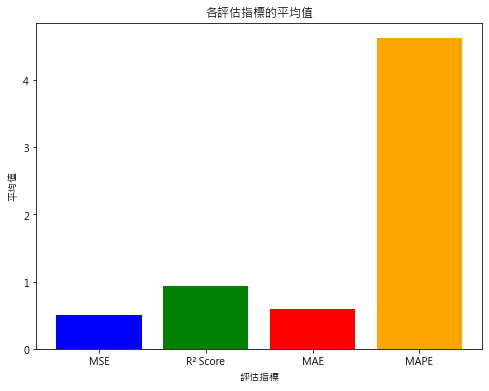

平均 MAPE: 4.624219816055998
平均 MSE: 0.49875105336540193
平均 R² Score: 0.941214060978743
平均 MAE: 0.5940189221399389


In [24]:
# KFold 交叉驗證

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

X = df[['year']]
y = df['salary_difference']

# 定義 KFold 參數
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 初始化模型
model = LinearRegression()

# 初始化指標列表
mse_scores = []
r2_scores = []
mae_scores = []
mape_scores = []

for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # 訓練模型
    model.fit(X_train, y_train)
    
    # 預測
    y_pred = model.predict(X_test)
    
    # 計算指標
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # 計算MAPE
    mape = calculate_mape(y_pred, y_test)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mape_scores.append(mape)

# 計算各指標的平均值
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)

# 顯示各指標的柱狀圖
metrics = ['MSE', 'R² Score', 'MAE', 'MAPE']
metric_values = [average_mse, average_r2, average_mae, average_mape]

plt.figure(figsize=(8, 6))
plt.bar(metrics, metric_values, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('評估指標')
plt.ylabel('平均值')
plt.title('各評估指標的平均值')
plt.show()

# 評估指標的平均值
print("平均 MAPE:", average_mape)
print("平均 MSE:", np.mean(mse_scores))#其值越小代表模型的預測越準確
print("平均 R² Score:", np.mean(r2_scores))#越接近 1 表示模型對資料的解釋能力越好
print("平均 MAE:", np.mean(mae_scores))#其值越小代表模型預測的誤差越小

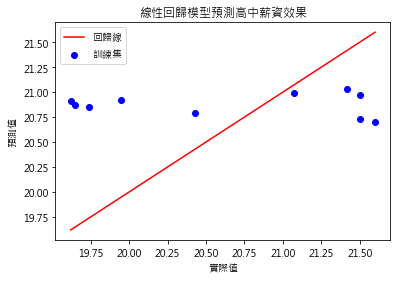

MAPE: 3.7385160797807537
迴歸係數: [0.00927121]
截距: 2.4031465615734433
MAE: 0.7607287878830622
MSE: 0.7282650213710202
R^2 Score: -0.11284721243218221


In [42]:
# 使用其他目標值建立模型
# 預測高中薪資

def calculate_mape(y_true, y_pred):
    # 避免除以0的情況，如果實際值為0，將其替換為一個非常小的值
    y_true = [val if val != 0 else 0.000001 for val in y_true]
    
    # 計算絕對百分比誤差
    errors = abs((y_true - y_pred) / y_true)
    
    # 計算MAPE並返回平均值
    mape = (sum(errors) / len(y_true)) * 100
    return mape

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 提取特徵和目標變量
X = df[['year']]
y = df['high_school']  # 選擇 'high_school' 作為目標值

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 繪製回歸線
plt.scatter(y_test, y_pred, color='blue', label='訓練集')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='回歸線')  
plt.xlabel("實際值")
plt.ylabel("預測值")
plt.title("線性回歸模型預測高中薪資效果")
plt.legend()
plt.show()

# 計算並輸出MAPE
mape = calculate_mape(y_test, y_pred)
print("MAPE:", mape)

# 評估模型
print("迴歸係數:", model.coef_)
print("截距:", model.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# 表現不佳。MAE、MSE較高，而R²分數為負值，模型對於測試集的解釋能力很差。

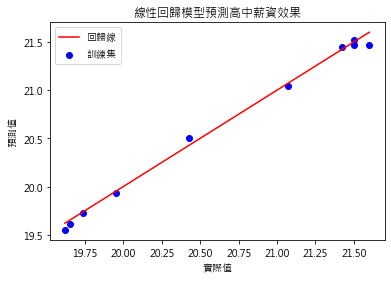

MAPE: 0.21595420472410315
迴歸係數: [0.01025583 0.02346319 0.57788003 0.39566242]
截距: -21.154297757481096
MAE: 0.04471144526516433
MSE: 0.003161251331273725
R^2 Score: 0.9951693550718905


In [29]:
# 嘗試添加更多特徵來擴充模型，看看是否能提高預測性能

X = df[['year', 'bachelors_degree', 'men_high_school', 'women_high_school']]
y = df['high_school']  # 選擇 'high_school' 作為目標值

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 繪製回歸線
plt.scatter(y_test, y_pred, color='blue', label='訓練集')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='回歸線')  
plt.xlabel("實際值")
plt.ylabel("預測值")
plt.title("線性回歸模型預測高中薪資效果")
plt.legend()
plt.show()

# 計算MAPE
mape = calculate_mape(y_test, y_pred)
print("MAPE:", mape)

# 評估模型
print("迴歸係數:", model.coef_)
print("截距:", model.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# 模型的表現有了顯著的改善。MAPE很小且MSE減小到很小的數值，而R²分數接近於1，意味著模型很好地擬合了資料，能夠解釋目標變數的大部分變異。
# 年代(year)：反映了時間趨勢和可能的通脹情況，對薪資有一定影響。
# 學士學歷薪資(bachelors_degree)：可能與高中學歷薪資存在某種關聯，例如學歷對薪資水平的整體提升
# 男性高中學歷薪資和女性高中學歷薪資(men_high_school、women_high_school)：反映了性別間薪資差異對整體薪資的影響。

In [33]:
# 將所有評估指標都納入KFold交叉驗證的評估中

from sklearn.model_selection import cross_validate
import numpy as np

X = df[['year', 'bachelors_degree', 'men_high_school', 'women_high_school']]
y = df['high_school']

# 使用交叉驗證計算多個評估指標
scoring = {'r2': 'r2', 
           'neg_mean_squared_error': 'neg_mean_squared_error', 
           'neg_mean_absolute_error': 'neg_mean_absolute_error', 
           'mape': make_scorer(calculate_mape, greater_is_better=False)}
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# 輸出交叉驗證的結果
print("交叉驗證 MAPE:", -cv_results['test_mape'])
print("平均 MAPE:", np.mean(-cv_results['test_mape']))
print("交叉驗證 R² 分數:", cv_results['test_r2'])
print("平均 R² 分數:", np.mean(cv_results['test_r2']))
print("交叉驗證 負 MSE:", -cv_results['test_neg_mean_squared_error'])
print("平均 MSE:", np.mean(-cv_results['test_neg_mean_squared_error']))
print("交叉驗證 負 MAE:", -cv_results['test_neg_mean_absolute_error'])
print("平均 MAE:", np.mean(-cv_results['test_neg_mean_absolute_error']))

# 交叉驗證的R²分數非常高，而平均的MSE和MAE也相對較低，這些指標顯示模型在測試資料上的表現良好

交叉驗證 MAPE: [0.17625227 0.07750503 0.31530893 0.41211388 0.74094644]
平均 MAPE: 0.3444253111796525
交叉驗證 R² 分數: [0.99706468 0.99436521 0.98690531 0.93210375 0.82501752]
平均 R² 分數: 0.947091294945627
交叉驗證 負 MSE: [0.00166085 0.00050177 0.00496238 0.00918779 0.03968953]
平均 MSE: 0.011200462708153485
交叉驗證 負 MAE: [0.03744566 0.01622455 0.06365324 0.08414143 0.16075727]
平均 MAE: 0.07244442874301363


MAPE: 0.661846367526203
MAE: 0.1341200000000075
MSE: 0.026371034000002763
R^2 Score: 0.959702950416856


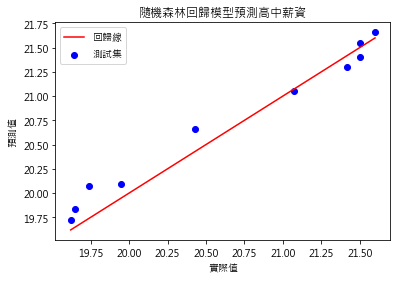

In [36]:
# 使用隨機森林回歸模型預測高中薪資

from sklearn.ensemble import RandomForestRegressor

# 特徵和目標
X = df[['year', 'bachelors_degree', 'men_high_school', 'women_high_school']]
y = df['high_school']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化並訓練隨機森林回歸模型
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算MAPE
mape = calculate_mape(y_test, y_pred)
print("MAPE:", mape)

# 評估模型
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
    
# 繪製預測圖
plt.scatter(y_test, y_pred, color='blue', label='測試集')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='回歸線')  

plt.xlabel("實際值")
plt.ylabel("預測值")
plt.title("隨機森林回歸模型預測高中薪資")
plt.legend()
plt.show()

交叉驗證 MAPE: [1.78297138 0.53786499 0.54881192 2.30012654 4.51232573]
平均 MAPE: 1.9364201116261945
交叉驗證 R² 分數: [ 0.46499923  0.84288329  0.95698102 -1.2000627  -4.08412826]
平均 R² 分數: -0.6038654833357151
交叉驗證 負 MSE: [0.30271199 0.01399109 0.01630251 0.29771469 1.15318197]
平均 MSE: 0.35678045019999594
交叉驗證 負 MAE: [0.3926  0.11316 0.11094 0.46927 0.97522]
平均 MAE: 0.4122380000000003


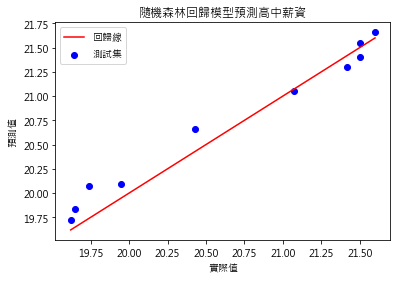

In [39]:
# 使用隨機森林回歸模型結合交叉驗證預測結果

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
# 特徵和目標
X = df[['year', 'bachelors_degree', 'men_high_school', 'women_high_school']]
y = df['high_school']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化並訓練隨機森林回歸模型
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 定義評估指標
scoring = {
    'r2': make_scorer(r2_score),
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'mape': make_scorer(calculate_mape, greater_is_better=False)
}

# 預測
y_pred = model.predict(X_test)

# 使用 cross_validate 進行 5 折交叉驗證
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# 輸出交叉驗證的結果
print("交叉驗證 MAPE:", -cv_results['test_mape'])
print("平均 MAPE:", np.mean(-cv_results['test_mape']))
print("交叉驗證 R² 分數:", cv_results['test_r2'])
print("平均 R² 分數:", np.mean(cv_results['test_r2']))
print("交叉驗證 負 MSE:", -cv_results['test_neg_mean_squared_error'])
print("平均 MSE:", np.mean(-cv_results['test_neg_mean_squared_error']))
print("交叉驗證 負 MAE:", -cv_results['test_neg_mean_absolute_error'])
print("平均 MAE:", np.mean(-cv_results['test_neg_mean_absolute_error']))

# 繪製預測圖
plt.scatter(y_test, y_pred, color='blue', label='測試集')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='回歸線')  

plt.xlabel("實際值")
plt.ylabel("預測值")
plt.title("隨機森林回歸模型預測高中薪資")
plt.legend()
plt.show()

# 平均 R² 分數為 -0.60 可能表明模型在某些折疊上表現很差，整體性能相對較差。
# 平均 MSE 為 0.36 可能表明在一些折疊上有較好的擬合，但在其他折疊上可能存在過擬合或擬合不足。
# 較小的 MAE（0.41）表明模型的預測值與實際值的平均差異相對較小。
# 模型在不同折疊上表現存在差異，可能在某些情況下過擬合或者擬合不足

交叉驗證 MAPE: [1.78297138 0.53786499 0.54881192 2.30012654 4.51232573]
平均 MAPE: 1.9364201116261945
交叉驗證 R² 分數: [ 0.46499923  0.84288329  0.95698102 -1.2000627  -4.08412826]
平均 R² 分數: -0.6038654833357151
交叉驗證 負 MSE: [0.30271199 0.01399109 0.01630251 0.29771469 1.15318197]
平均 MSE: 0.35678045019999594
交叉驗證 負 MAE: [0.3926  0.11316 0.11094 0.46927 0.97522]
平均 MAE: 0.4122380000000003
最佳模型的 MAPE: 0.20889045070576776
最佳模型的 MSE: 0.00412777519999976
最佳模型的 R² 分數: 0.9923649421964318
最佳模型的 MAE: 0.04405999999999779


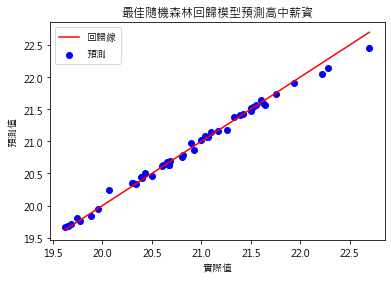

In [41]:
# 使用GridSearchCV進行超參數調整找到最佳參數組合

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 特徵和目標
X = df[['year', 'bachelors_degree', 'men_high_school', 'women_high_school']]
y = df['high_school']

# 初始化隨機森林回歸模型
model = RandomForestRegressor(random_state=42)

# 定義評估指標
scoring = {
    'r2': make_scorer(r2_score),
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'mape': make_scorer(calculate_mape, greater_is_better=False)
}

# 使用 cross_validate 進行 5 折交叉驗證
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# 輸出交叉驗證的結果
print("交叉驗證 MAPE:", -cv_results['test_mape'])
print("平均 MAPE:", np.mean(-cv_results['test_mape']))
print("交叉驗證 R² 分數:", cv_results['test_r2'])
print("平均 R² 分數:", np.mean(cv_results['test_r2']))
print("交叉驗證 負 MSE:", -cv_results['test_neg_mean_squared_error'])
print("平均 MSE:", np.mean(-cv_results['test_neg_mean_squared_error']))
print("交叉驗證 負 MAE:", -cv_results['test_neg_mean_absolute_error'])
print("平均 MAE:", np.mean(-cv_results['test_neg_mean_absolute_error']))

# 嘗試調整模型參數
param_grid = {
    'n_estimators': [50, 100, 200], # 樹木的數量，表示模型將嘗試使用 50、100 和 200 棵樹構建隨機森林。
    'max_depth': [None, 10, 20],    # 樹的最大深度，表示模型將嘗試不限制深度（None 表示不限制深度）、深度為 10 和深度為 20 的樹。
    'min_samples_split': [2, 5, 10],# 內部節點分裂所需的最小樣本數，表示模型將嘗試使用 2、5 和 10 作為內部節點分裂的最小樣本數。
    'min_samples_leaf': [1, 2, 4]   # 葉節點所需的最小樣本數，表示模型將嘗試使用 1、2 和 4 作為葉節點所需的最小樣本數。
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

# 使用最佳模型進行預測
y_pred = best_model.predict(X)

# 輸出最佳模型的性能
mape = calculate_mape(y, y_pred)
print("最佳模型的 MAPE:", mape)
print("最佳模型的 MSE:", mean_squared_error(y, y_pred))
print("最佳模型的 R² 分數:", r2_score(y, y_pred))
print("最佳模型的 MAE:", mean_absolute_error(y, y_pred))

# 繪製預測圖
plt.scatter(y, y_pred, color='blue', label='預測')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='回歸線')  
plt.xlabel("實際值")
plt.ylabel("預測值")
plt.title("最佳隨機森林回歸模型預測高中薪資")
plt.legend()
plt.show()

#1.交叉驗證評估：
   #MAPE:數值小，表示模型預測的平均絕對百分比誤差小僅為21%。
   #R² 分數：交叉驗證中的 R² 分數在不同折疊之間有很大變化，平均 R² 分數為負，可能表示模型在某些子集上表現不佳。
   #MSE：交叉驗證中的 MSE 波動較大，平均 MSE 較高，這也表明模型的預測可能存在較大的誤差。
   #MAE：交叉驗證中的 MAE 較小，但仍然需要綜合考慮其他指標。
#2.最佳模型性能：
   #最佳模型的 R² 分數非常高，接近於 1，表示模型在整體數據上有很好的擬合。
   #最佳模型的 MSE 較小，表示模型預測的方差較小。
   #最佳模型的 MAE 也相對較小，表示模型的平均絕對誤差較小。
#3.對比分析：
   #最佳模型的性能指標與交叉驗證結果有較大差異，這可能表明模型對某些數據子集的過擬合或者存在某些異常值。
   #考慮檢查數據集中是否存在異常值，以及是否有必要進行數據清理或特殊處理。
   #最佳模型的指標顯示了更好的表現：MAPE 為 0.21、R² 分數為 0.99，這顯示該模型相對於其他模型具有更好的預測能力和配適度。
